In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from binance_data_loader_4h import BinanceDataLoader
from tqdm import tqdm

In [29]:
data_loader = BinanceDataLoader(
    data_directory=r"C:\Users\USER\Documents\Binance_related\4hdata2020",
    min_records=300,
    min_volume=1e4,
    start_date="2021-01-01",
    end_date=None
)

Loading Binance data from C:\Users\USER\Documents\Binance_related\4hdata2020...
Found 548 USDT trading pairs
✓ BTCUSDT loaded successfully with 10390 records, avg volume: 59,948
Loaded 501 cryptocurrencies
Filtered 45 cryptocurrencies (insufficient data/volume)
Precomputing returns matrix (FAST numpy version)...
Building returns matrix for 501 tickers over 10390 dates...
Precomputed returns matrix shape: (10390, 501)
Date range: 2021-01-01 00:00:00 to 2025-09-28 12:00:00


In [40]:
price = data_loader.get_price_matrix()
price

,1000000BOBUSDT,1000000MOGUSDT,1000BONKUSDT,1000CATUSDT,1000CHEEMSUSDT,1000FLOKIUSDT,1000LUNCUSDT,1000PEPEUSDT,1000RATSUSDT,1000SATSUSDT,...,ZENUSDT,ZEREBROUSDT,ZETAUSDT,ZILUSDT,ZKJUSDT,ZKUSDT,ZORAUSDT,ZRCUSDT,ZROUSDT,ZRXUSDT
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.332,NaN,NaN,0.08775,NaN,NaN,NaN,NaN,NaN,0.3611
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.940,NaN,NaN,0.08484,NaN,NaN,NaN,NaN,NaN,0.3566
2021-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.359,NaN,NaN,0.08270,NaN,NaN,NaN,NaN,NaN,0.3614
2021-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.447,NaN,NaN,0.08118,NaN,NaN,NaN,NaN,NaN,0.3687
2021-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.537,NaN,NaN,0.07914,NaN,NaN,NaN,NaN,NaN,0.3621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-27 20:00:00,0.04037,0.6443,0.019091,0.007163,0.001106,0.08146,0.05396,0.009237,0.02960,0.000043,...,6.379,0.01759,0.1660,0.01040,0.1289,0.05003,0.05671,0.02113,2.2863,0.2358
2025-09-28 00:00:00,0.03961,0.6349,0.018984,0.007125,0.001098,0.08067,0.05377,0.009152,0.02737,0.000042,...,6.358,0.01751,0.1643,0.01034,0.1267,0.04951,0.05564,0.02095,2.4263,0.2345
2025-09-28 04:00:00,0.03943,0.6332,0.018887,0.007053,0.001097,0.08027,0.05357,0.009170,0.02605,0.000041,...,6.358,0.01738,0.1633,0.01028,0.1260,0.04924,0.05556,0.02088,2.3432,0.2331
2025-09-28 08:00:00,0.03936,0.6283,0.018697,0.006998,0.001089,0.07971,0.05350,0.009115,0.02672,0.000040,...,6.314,0.01730,0.1618,0.01024,0.1261,0.04892,0.05481,0.02080,2.3012,0.2322


In [41]:
n = 56 
rets = price.shift(6).pct_change(n)
equity = [1.0]
rets

C:\Users\USER\AppData\Local\Temp\ipykernel_1372\522801183.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = price.shift(6).pct_change(n)


,1000000BOBUSDT,1000000MOGUSDT,1000BONKUSDT,1000CATUSDT,1000CHEEMSUSDT,1000FLOKIUSDT,1000LUNCUSDT,1000PEPEUSDT,1000RATSUSDT,1000SATSUSDT,...,ZENUSDT,ZEREBROUSDT,ZETAUSDT,ZILUSDT,ZKJUSDT,ZKUSDT,ZORAUSDT,ZRCUSDT,ZROUSDT,ZRXUSDT
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-27 20:00:00,-0.212243,-0.283889,-0.165343,-0.112161,-0.100016,-0.128643,-0.083404,-0.135228,0.193918,0.259352,...,-0.111281,-0.147358,-0.090811,-0.093913,-0.252971,-0.122890,-0.199048,-0.148045,0.243688,-0.078439
2025-09-28 00:00:00,-0.225363,-0.335275,-0.218672,-0.147019,-0.105212,-0.168258,-0.098974,-0.157328,0.224841,0.133971,...,-0.130122,-0.173852,-0.123309,-0.121289,-0.271309,-0.143272,-0.237441,-0.177519,0.184119,-0.115687
2025-09-28 04:00:00,-0.235404,-0.365377,-0.239210,-0.162424,-0.125982,-0.191510,-0.109291,-0.181947,0.313653,0.232227,...,-0.147363,-0.176498,-0.130435,-0.141785,-0.279379,-0.151637,-0.245872,-0.200980,0.196087,-0.131763
2025-09-28 08:00:00,-0.257299,-0.348580,-0.238544,-0.152835,-0.125236,-0.198573,-0.109533,-0.200698,0.311700,0.286052,...,-0.157225,-0.181776,-0.144824,-0.141431,-0.286031,-0.147737,-0.191964,-0.207078,0.168230,-0.133676


In [42]:
# Get volume data for universe selection with 20-day rolling average
volume_data = {}
for ticker in data_loader.get_universe():
    ticker_data = data_loader._crypto_universe[ticker]['data']
    volume_data[ticker] = ticker_data['volume'].reindex(price.index)

volume_matrix = pd.DataFrame(volume_data, index=price.index)

# Calculate 20-day rolling average volume
rolling_volume_matrix = volume_matrix.rolling(window=20, min_periods=10).mean()

# Calculate rolling volatility for weighting (using 30-day window)
vol_window = 30
volatility = price.pct_change().rolling(vol_window).std()

# Calculate BTC 90-day total return for market filter
btc_90d_return = price["BTCUSDT"].pct_change(90)

k = 10  # Number of coins to go long/short
n_universe = 50  # Top N volume universe to select from each day

for i in range(n, len(price)-1):
    current_date = price.index[i]
    
    '''# BTC Market Filter: Skip trading if BTC 90-day return is negative
    if not pd.isna(btc_90d_return.iloc[i]) and btc_90d_return.iloc[i] < 0:
        equity.append(equity[-1])  # Hold cash during crypto bear markets
        continue'''
    
    # Get 20-day rolling average volume for current date
    current_volumes = rolling_volume_matrix.iloc[i].dropna()
    
    # Skip if no volume data available
    if len(current_volumes) == 0:
        equity.append(equity[-1])
        continue
    
    # Select top N_universe by 20-day rolling volume for this day
    top_volume_tickers = current_volumes.nlargest(n_universe).index
    
    # Get momentum returns for the volume-filtered universe
    row = rets.iloc[i]
    filtered_returns = row[top_volume_tickers].dropna()
    
    # Skip if no valid returns in the volume universe
    if len(filtered_returns) == 0:
        equity.append(equity[-1])
        continue

    # Simple momentum ranking: top performers go long, bottom performers go short
    long_coins = filtered_returns.nlargest(k).index   # top k momentum
    short_coins = filtered_returns.nsmallest(k).index # bottom k momentum

    # Calculate inverse volatility weights
    long_vols = volatility.iloc[i][long_coins]
    short_vols = volatility.iloc[i][short_coins]
    
    # Remove coins with NaN volatility
    long_valid = long_vols.dropna()
    short_valid = short_vols.dropna()
    
    if len(long_valid) == 0 or len(short_valid) == 0:
        equity.append(equity[-1])
        continue
    
    # Inverse volatility weights (higher weight for lower vol)
    long_weights = 1 / long_valid
    short_weights = 1 / short_valid
    
    # Normalize so each side sums to 0.5 (equal long/short exposure)
    long_weights = long_weights / long_weights.sum() * 0.5
    short_weights = short_weights / short_weights.sum() * 0.5

    # Calculate weighted returns for the next day
    long_return = 0
    short_return = 0
    
    for coin in long_weights.index:
        p0 = price[coin].iat[i]
        p1 = price[coin].iat[i+1]
        if np.isfinite(p0) and p0 != 0 and np.isfinite(p1):
            coin_return = (p1 - p0) / p0
            long_return += long_weights[coin] * coin_return

    for coin in short_weights.index:
        p0 = price[coin].iat[i]
        p1 = price[coin].iat[i+1]
        if np.isfinite(p0) and p0 != 0 and np.isfinite(p1):
            coin_return = (p1 - p0) / p0
            short_return += short_weights[coin] * coin_return

    # Portfolio return: long - short - fees
    portfolio_return = long_return - short_return - 0  # 5bps fees
    equity.append(equity[-1] * (1 + portfolio_return))

C:\Users\USER\AppData\Local\Temp\ipykernel_1372\2616514770.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility = price.pct_change().rolling(vol_window).std()


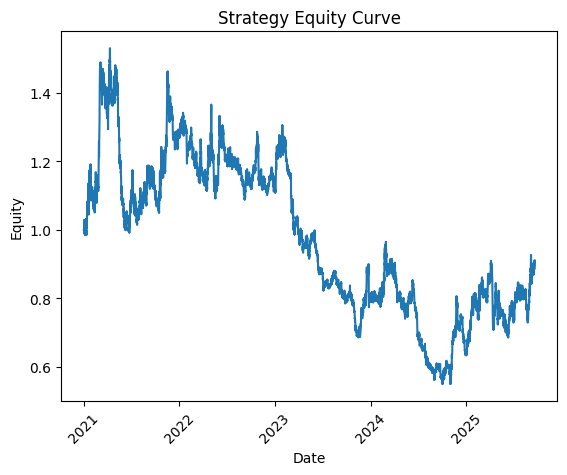

In [43]:
plt.plot(price.index[:len(equity)], equity)
plt.xlabel("Date")
plt.ylabel("Equity")
plt.title("Strategy Equity Curve")
plt.xticks(rotation=45)
plt.show()

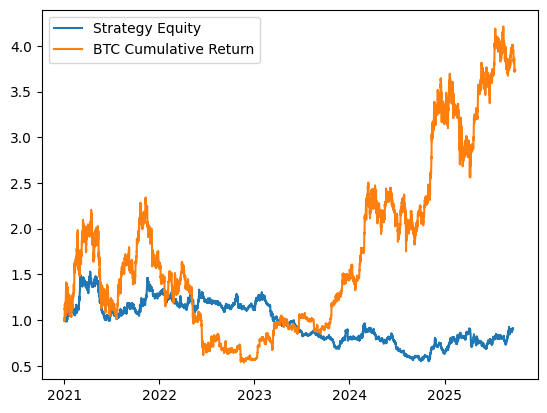

In [44]:
# Example: align equity with df index
equity_series = pd.Series(equity, index=price.index[:len(equity)])

# BTC cumulative return
btc_cumret = (1 + price["BTCUSDT"].pct_change().fillna(0)).cumprod()

plt.plot(equity_series, label="Strategy Equity")
plt.plot(btc_cumret, label="BTC Cumulative Return")

plt.legend()
plt.show()

TIME-VARYING CONDITIONAL ACF ANALYSIS
Analyzing time-varying patterns in conditional autocorrelations...
Analyzing time-varying ACF for: ['BTCUSDT', 'ETHUSDT', 'BNBUSDT']
\nProcessing BTCUSDT...
\nProcessing ETHUSDT...


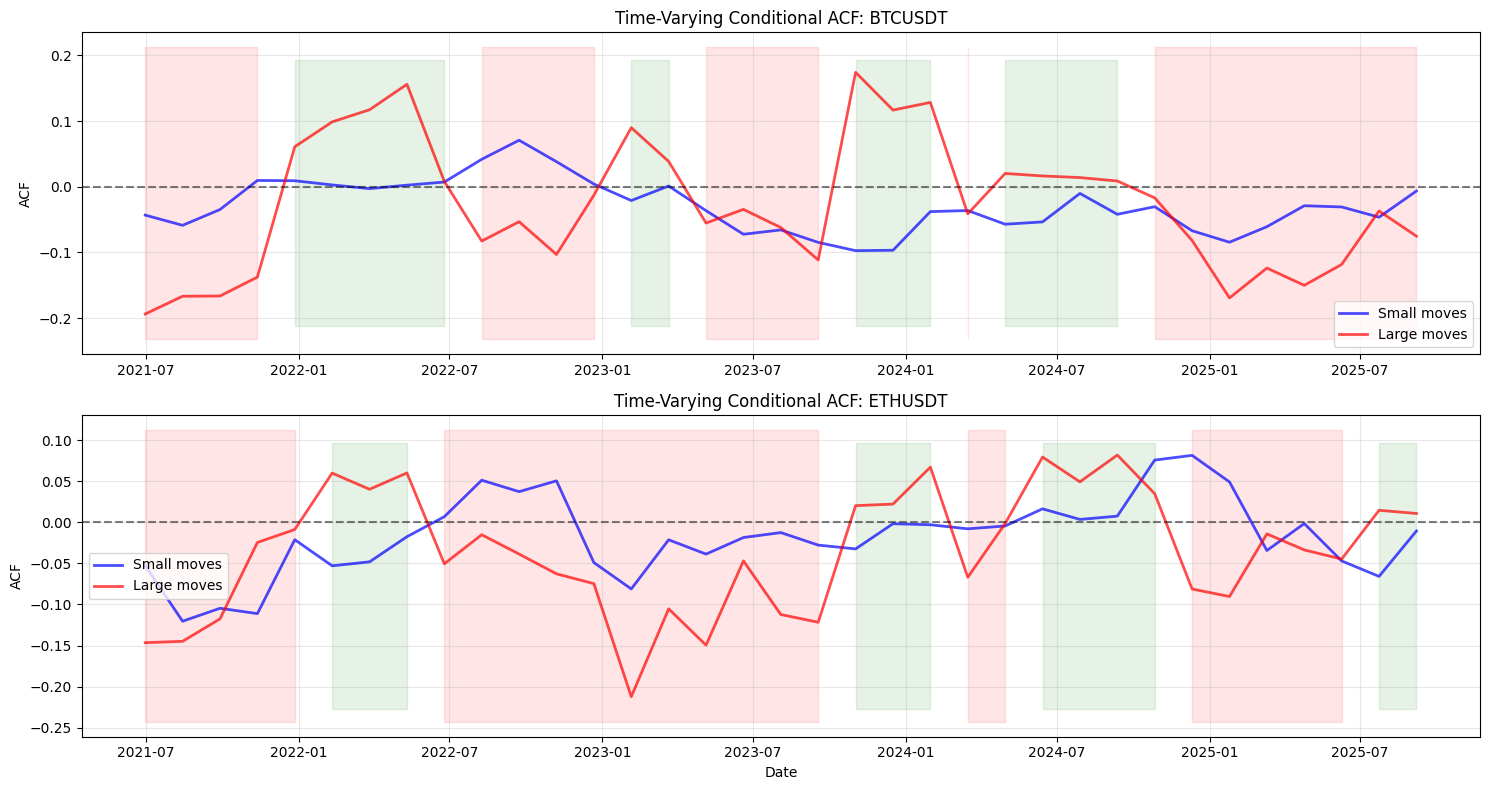

\nTime-Varying Pattern Summary:
\nBTCUSDT:
  • Total analysis periods: 35
  • Strong momentum periods: 10 (28.6%)
  • Strong mean reversion periods: 19 (54.3%)
  • Neutral periods: 6 (17.1%)
\nETHUSDT:
  • Total analysis periods: 35
  • Strong momentum periods: 10 (28.6%)
  • Strong mean reversion periods: 19 (54.3%)
  • Neutral periods: 6 (17.1%)
\n============================================================
TIME-VARYING ANALYSIS COMPLETE


In [17]:
# Time-Varying Analysis (Optional Deep Dive)
print("=" * 60)
print("TIME-VARYING CONDITIONAL ACF ANALYSIS")
print("=" * 60)

# Check if returns_major exists, if not create it
if 'returns_major' not in locals():
    print("Creating returns_major for time-varying analysis...")
    # Calculate 4h returns from price matrix
    returns_4h = price.pct_change().fillna(0)
    
    # Filter to major cryptocurrencies with sufficient data
    min_observations = 1000  # Minimum 4h bars for analysis
    major_cryptos = []
    
    for col in returns_4h.columns:
        valid_data = returns_4h[col].dropna()
        if len(valid_data) >= min_observations:
            major_cryptos.append(col)
    
    returns_major = returns_4h[major_cryptos].copy()
    print(f"Created returns_major with {len(major_cryptos)} cryptocurrencies")

# Analyze how conditional ACF changes over time
print("Analyzing time-varying patterns in conditional autocorrelations...")

# Calculate rolling ACF over time (using 6-month windows)
window_size = 6 * 30 * 6  # Approximately 6 months in 4h bars
min_window_obs = window_size // 2

# Select a few representative assets for time-varying analysis
representative_assets = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT']
available_repr_assets = [asset for asset in representative_assets if asset in returns_major.columns]

if len(available_repr_assets) > 0:
    print(f"Analyzing time-varying ACF for: {available_repr_assets}")
    
    # Calculate rolling conditional ACF
    rolling_results = {}
    
    for asset in available_repr_assets[:2]:  # Limit to 2 assets for performance
        print(f"\\nProcessing {asset}...")
        
        asset_returns = returns_major[asset].dropna()
        if len(asset_returns) < window_size:
            continue
            
        rolling_acf = []
        dates = []
        
        # Calculate rolling windows
        for i in range(window_size, len(asset_returns), window_size//4):  # Overlap windows
            window_data = asset_returns.iloc[i-window_size:i]
            
            if len(window_data) >= min_window_obs:
                # Create single-asset DataFrame for the function
                temp_df = pd.DataFrame({asset: window_data})
                
                try:
                    acf_result = conditional_acf_by_magnitude(temp_df, lag=1, large_q=0.9, small_q=0.5)
                    if not acf_result.empty and asset in acf_result.index:
                        rolling_acf.append({
                            'date': window_data.index[-1],
                            'small': acf_result.loc[asset, 'small'],
                            'large': acf_result.loc[asset, 'large'],
                            'pos_large': acf_result.loc[asset, 'pos_large'],
                            'neg_large': acf_result.loc[asset, 'neg_large']
                        })
                except:
                    continue
        
        if rolling_acf:
            rolling_results[asset] = pd.DataFrame(rolling_acf).set_index('date')
    
    # Plot time-varying results
    if rolling_results:
        fig, axes = plt.subplots(len(rolling_results), 1, figsize=(15, 4*len(rolling_results)))
        if len(rolling_results) == 1:
            axes = [axes]
        
        for idx, (asset, data) in enumerate(rolling_results.items()):
            ax = axes[idx]
            
            # Plot rolling ACF components
            ax.plot(data.index, data['small'], label='Small moves', color='blue', alpha=0.7, linewidth=2)
            ax.plot(data.index, data['large'], label='Large moves', color='red', alpha=0.7, linewidth=2)
            ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
            
            ax.set_title(f'Time-Varying Conditional ACF: {asset}')
            ax.set_ylabel('ACF')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            # Add regime indicators
            ax.fill_between(data.index, ax.get_ylim()[0], ax.get_ylim()[1], 
                           where=data['large'] > 0, alpha=0.1, color='green', label='Momentum periods')
            ax.fill_between(data.index, ax.get_ylim()[0], ax.get_ylim()[1], 
                           where=data['large'] < 0, alpha=0.1, color='red', label='Mean reversion periods')
        
        plt.xlabel('Date')
        plt.tight_layout()
        plt.show()
        
        # Summary of time-varying patterns
        print(f"\\nTime-Varying Pattern Summary:")
        for asset, data in rolling_results.items():
            momentum_periods = (data['large'] > 0.02).sum()
            mean_rev_periods = (data['large'] < -0.02).sum()
            total_periods = len(data.dropna())
            
            print(f"\\n{asset}:")
            print(f"  • Total analysis periods: {total_periods}")
            print(f"  • Strong momentum periods: {momentum_periods} ({momentum_periods/total_periods*100:.1f}%)")
            print(f"  • Strong mean reversion periods: {mean_rev_periods} ({mean_rev_periods/total_periods*100:.1f}%)")
            print(f"  • Neutral periods: {total_periods - momentum_periods - mean_rev_periods} ({(total_periods - momentum_periods - mean_rev_periods)/total_periods*100:.1f}%)")
    
    else:
        print("Insufficient data for time-varying analysis.")
        
else:
    print("No representative assets available for time-varying analysis.")

print(f"\\n" + "="*60)
print("TIME-VARYING ANALYSIS COMPLETE")
print("="*60)

In [18]:
# Conditional Autocorrelation Analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import warnings

def conditional_acf_by_magnitude(returns, lag=1, large_q=0.9, small_q=0.5):
    """
    returns: DataFrame (index=time, cols=assets)
    lag: integer lag in bars
    large_q: quantile for "large" moves (abs)
    small_q: quantile for "small" moves (abs)
    -> returns DataFrame indexed by asset with columns: small, large, pos_large, neg_large
    """
    out = []
    
    # Suppress correlation warnings for cleaner output
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=RuntimeWarning, message='invalid value encountered in divide')
        
        for col in returns.columns:
            s = returns[col].dropna()
            if s.shape[0] <= lag+10:
                out.append((col, np.nan, np.nan, np.nan, np.nan)); continue

            abs_s = s.abs()
            
            # Skip if all values are the same (zero variance)
            if abs_s.std() == 0:
                out.append((col, np.nan, np.nan, np.nan, np.nan)); continue
                
            th_small = abs_s.quantile(small_q)
            th_large = abs_s.quantile(large_q)

            r_t = s.iloc[lag:]                 # aligned r_t
            r_lag = s.shift(lag).iloc[lag:]    # aligned r_{t-k}

            def safe_corr(mask):
                """Calculate correlation with proper error handling"""
                if mask.sum() < 10: 
                    return np.nan
                
                x = r_t[mask]
                y = r_lag[mask]
                
                # Check for zero variance
                if x.std() == 0 or y.std() == 0:
                    return np.nan
                
                # Check for identical values
                if len(x.unique()) == 1 or len(y.unique()) == 1:
                    return np.nan
                
                try:
                    corr_matrix = np.corrcoef(x, y)
                    corr_val = corr_matrix[0, 1]
                    
                    # Return NaN if correlation is not finite
                    if not np.isfinite(corr_val):
                        return np.nan
                    
                    return corr_val
                except:
                    return np.nan

            small_mask = r_lag.abs() <= th_small
            large_mask = r_lag.abs() > th_large
            pos_large = large_mask & (r_lag > 0)
            neg_large = large_mask & (r_lag < 0)

            out.append((col, safe_corr(small_mask), safe_corr(large_mask), safe_corr(pos_large), safe_corr(neg_large)))

    return pd.DataFrame(out, columns=['asset','small','large','pos_large','neg_large']).set_index('asset')

print("Conditional autocorrelation function loaded successfully!")
print("Enhanced with robust error handling for crypto data edge cases.")

Conditional autocorrelation function loaded successfully!
Enhanced with robust error handling for crypto data edge cases.


In [19]:
# Strategy Implications and Key Insights
print("=" * 60)
print("STRATEGY IMPLICATIONS FROM CONDITIONAL ACF ANALYSIS")
print("=" * 60)

# Check if results_summary exists, if not run basic analysis
if 'results_summary' not in locals():
    print("Running basic conditional ACF analysis for strategy implications...")
    
    # Ensure we have returns data
    if 'returns_major' not in locals():
        returns_4h = price.pct_change().fillna(0)
        min_observations = 1000
        major_cryptos = [col for col in returns_4h.columns if len(returns_4h[col].dropna()) >= min_observations]
        returns_major = returns_4h[major_cryptos].copy()
    
    # Run basic lag=1 analysis for strategy implications
    print("Calculating lag=1 conditional ACF...")
    lag1_results = conditional_acf_by_magnitude(returns_major, lag=1, large_q=0.9, small_q=0.5)
    
    # Create minimal results_summary for this analysis
    results_summary = {
        'lag_1': {
            'small_0.5_large_0.9': lag1_results
        }
    }
    print(f"Analysis complete for {len(lag1_results.dropna())} assets")

# Analyze the key findings
lag1_data = results_summary['lag_1']['small_0.5_large_0.9']

small_median = lag1_data['small'].median()
large_median = lag1_data['large'].median()
pos_large_median = lag1_data['pos_large'].median()
neg_large_median = lag1_data['neg_large'].median()

print(f"\\nKey Findings for 4H Cryptocurrency Returns:")
print(f"{'='*50}")

print(f"\\n1. MAGNITUDE-BASED PATTERNS:")
print(f"   • Small moves (≤50th percentile) ACF: {small_median:.4f}")
print(f"   • Large moves (>90th percentile) ACF: {large_median:.4f}")

if abs(large_median) > abs(small_median):
    stronger_pattern = "Large moves show stronger autocorrelation"
else:
    stronger_pattern = "Small moves show stronger autocorrelation"
print(f"   • Pattern strength: {stronger_pattern}")

print(f"\\n2. DIRECTIONAL ASYMMETRY:")
print(f"   • Positive large moves ACF: {pos_large_median:.4f}")
print(f"   • Negative large moves ACF: {neg_large_median:.4f}")

if pos_large_median > neg_large_median:
    asymmetry = "Positive large moves show stronger continuation"
elif neg_large_median > pos_large_median:
    asymmetry = "Negative large moves show stronger continuation"
else:
    asymmetry = "No clear directional asymmetry"
print(f"   • Asymmetry: {asymmetry}")

print(f"\\n3. MEAN REVERSION vs MOMENTUM:")
momentum_assets = (lag1_data['large'] > 0).sum()
mean_reversion_assets = (lag1_data['large'] < 0).sum()
total_valid = lag1_data['large'].dropna().shape[0]

print(f"   • Assets showing momentum after large moves: {momentum_assets}/{total_valid} ({momentum_assets/total_valid*100:.1f}%)")
print(f"   • Assets showing mean reversion after large moves: {mean_reversion_assets}/{total_valid} ({mean_reversion_assets/total_valid*100:.1f}%)")

if momentum_assets > mean_reversion_assets:
    dominant_pattern = "Momentum (continuation)"
else:
    dominant_pattern = "Mean reversion"
print(f"   • Dominant pattern: {dominant_pattern}")

print(f"\\n4. CURRENT STRATEGY ALIGNMENT:")
print(f"   • Current strategy: 14-period lagged momentum")
print(f"   • Median large move ACF: {large_median:.4f}")

if large_median > 0:
    strategy_alignment = "✓ ALIGNED - Positive ACF supports momentum strategy"
elif large_median < -0.02:
    strategy_alignment = "✗ MISALIGNED - Negative ACF suggests mean reversion would work better"
else:
    strategy_alignment = "⚠ WEAK SIGNAL - ACF close to zero, limited predictability"

print(f"   • Assessment: {strategy_alignment}")

print(f"\\n5. OPTIMIZATION SUGGESTIONS:")
if large_median < -0.02:
    print(f"   • Consider mean reversion strategy after large moves")
    print(f"   • Use magnitude-based regime switching")
elif large_median > 0.02:
    print(f"   • Current momentum approach seems appropriate")
    print(f"   • Consider focusing on assets with strongest momentum patterns")
else:
    print(f"   • Weak predictability suggests:")
    print(f"     - Focus on transaction cost minimization")
    print(f"     - Consider other signal sources")
    print(f"     - Use ensemble approaches")

# Asset-specific recommendations
print(f"\\n6. ASSET-SPECIFIC INSIGHTS:")
strong_momentum = lag1_data[lag1_data['large'] > 0.05]['large'].sort_values(ascending=False)
strong_mean_rev = lag1_data[lag1_data['large'] < -0.05]['large'].sort_values()

if len(strong_momentum) > 0:
    print(f"   • Top momentum assets: {list(strong_momentum.head(3).index)}")
if len(strong_mean_rev) > 0:
    print(f"   • Top mean reversion assets: {list(strong_mean_rev.head(3).index)}")

print(f"\\n" + "="*60)
print("ANALYSIS COMPLETE - USE THESE INSIGHTS TO OPTIMIZE STRATEGY")
print("="*60)

STRATEGY IMPLICATIONS FROM CONDITIONAL ACF ANALYSIS
\nKey Findings for 4H Cryptocurrency Returns:
\n1. MAGNITUDE-BASED PATTERNS:
   • Small moves (≤50th percentile) ACF: -0.0058
   • Large moves (>90th percentile) ACF: -0.0477
   • Pattern strength: Large moves show stronger autocorrelation
\n2. DIRECTIONAL ASYMMETRY:
   • Positive large moves ACF: -0.0027
   • Negative large moves ACF: -0.1123
   • Asymmetry: Positive large moves show stronger continuation
\n3. MEAN REVERSION vs MOMENTUM:
   • Assets showing momentum after large moves: 26/165 (15.8%)
   • Assets showing mean reversion after large moves: 139/165 (84.2%)
   • Dominant pattern: Mean reversion
\n4. CURRENT STRATEGY ALIGNMENT:
   • Current strategy: 14-period lagged momentum
   • Median large move ACF: -0.0477
   • Assessment: ✗ MISALIGNED - Negative ACF suggests mean reversion would work better
\n5. OPTIMIZATION SUGGESTIONS:
   • Consider mean reversion strategy after large moves
   • Use magnitude-based regime switching


Creating comprehensive visualizations for conditional autocorrelation analysis...


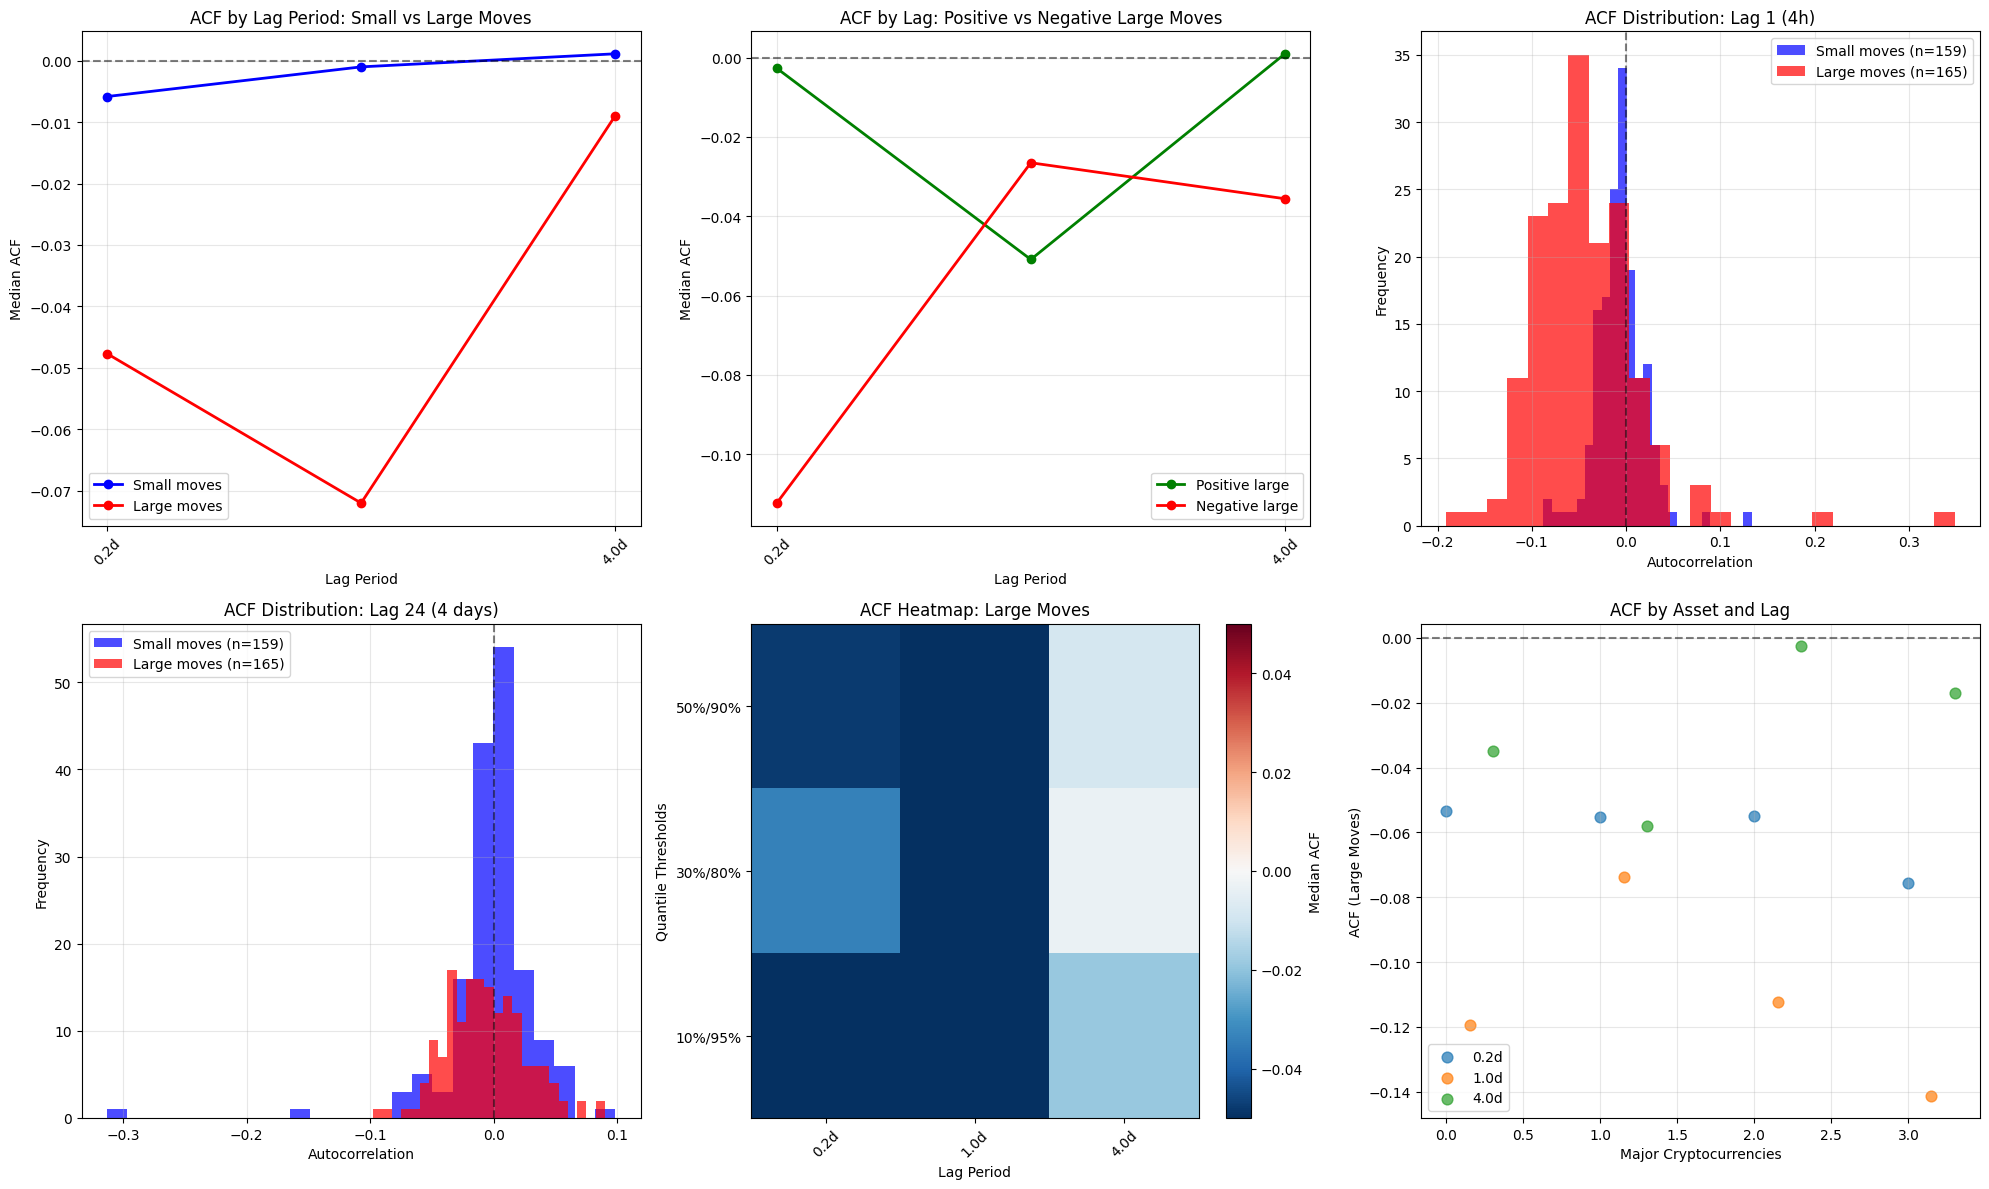

Comprehensive visualization complete!


In [20]:
# Comprehensive Visualization of Conditional ACF Results
print("Creating comprehensive visualizations for conditional autocorrelation analysis...")

# Check if results_summary exists, if not run basic analysis
if 'results_summary' not in locals():
    print("Running conditional ACF analysis for visualization...")
    
    # Ensure we have returns data
    if 'returns_major' not in locals():
        returns_4h = price.pct_change().fillna(0)
        min_observations = 1000
        major_cryptos = [col for col in returns_4h.columns if len(returns_4h[col].dropna()) >= min_observations]
        returns_major = returns_4h[major_cryptos].copy()
    
    # Run analysis for multiple lags
    lags_to_test = [1, 2, 3, 6, 12, 18, 24, 36, 48, 72, 96, 120, 168]
    results_summary = {}
    for lag in lags_to_test:
        lag_results = {}
        for small_q, large_q in [(0.5, 0.9), (0.3, 0.8), (0.1, 0.95)]:
            acf_results = conditional_acf_by_magnitude(returns_major, lag=lag, large_q=large_q, small_q=small_q)
            key = f"small_{small_q}_large_{large_q}"
            lag_results[key] = acf_results
        results_summary[f'lag_{lag}'] = lag_results
    print("Analysis complete for visualization")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Extract lag data for plotting
available_lags = [int(k.split('_')[1]) for k in results_summary.keys()]
available_lags.sort()

# Plot 1: ACF by Lag Period (Small vs Large Moves)
ax1 = axes[0, 0]
small_acf_by_lag = []
large_acf_by_lag = []
lag_labels = []

for lag in available_lags:
    lag_data = results_summary[f'lag_{lag}']['small_0.5_large_0.9']
    small_med = lag_data['small'].median()
    large_med = lag_data['large'].median()
    
    if not pd.isna(small_med) and not pd.isna(large_med):
        small_acf_by_lag.append(small_med)
        large_acf_by_lag.append(large_med)
        lag_labels.append(f"{lag*4/24:.1f}d")

x_pos = range(len(lag_labels))
ax1.plot(x_pos, small_acf_by_lag, 'o-', color='blue', label='Small moves', linewidth=2, markersize=6)
ax1.plot(x_pos, large_acf_by_lag, 'o-', color='red', label='Large moves', linewidth=2, markersize=6)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_xticks(x_pos[::2])  # Show every other label to avoid crowding
ax1.set_xticklabels(lag_labels[::2], rotation=45)
ax1.set_xlabel('Lag Period')
ax1.set_ylabel('Median ACF')
ax1.set_title('ACF by Lag Period: Small vs Large Moves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Positive vs Negative Large Moves by Lag
ax2 = axes[0, 1]
pos_large_by_lag = []
neg_large_by_lag = []

for lag in available_lags:
    lag_data = results_summary[f'lag_{lag}']['small_0.5_large_0.9']
    pos_med = lag_data['pos_large'].median()
    neg_med = lag_data['neg_large'].median()
    
    if not pd.isna(pos_med) and not pd.isna(neg_med):
        pos_large_by_lag.append(pos_med)
        neg_large_by_lag.append(neg_med)

x_pos = range(len(lag_labels))
ax2.plot(x_pos, pos_large_by_lag, 'o-', color='green', label='Positive large', linewidth=2, markersize=6)
ax2.plot(x_pos, neg_large_by_lag, 'o-', color='red', label='Negative large', linewidth=2, markersize=6)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_xticks(x_pos[::2])
ax2.set_xticklabels(lag_labels[::2], rotation=45)
ax2.set_xlabel('Lag Period')
ax2.set_ylabel('Median ACF')
ax2.set_title('ACF by Lag: Positive vs Negative Large Moves')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Distribution for Lag=1 (Short-term)
ax3 = axes[0, 2]
if 'lag_1' in results_summary:
    lag1_results = results_summary['lag_1']['small_0.5_large_0.9']
    small_acf = lag1_results['small'].dropna()
    large_acf = lag1_results['large'].dropna()
    
    ax3.hist(small_acf, bins=25, alpha=0.7, label=f'Small moves (n={len(small_acf)})', color='blue')
    ax3.hist(large_acf, bins=25, alpha=0.7, label=f'Large moves (n={len(large_acf)})', color='red')
    ax3.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax3.set_xlabel('Autocorrelation')
    ax3.set_ylabel('Frequency')
    ax3.set_title('ACF Distribution: Lag 1 (4h)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# Plot 4: Distribution for Lag=24 (Daily)
ax4 = axes[1, 0]
if 'lag_24' in results_summary:
    lag24_results = results_summary['lag_24']['small_0.5_large_0.9']
    small_acf_24 = lag24_results['small'].dropna()
    large_acf_24 = lag24_results['large'].dropna()
    
    ax4.hist(small_acf_24, bins=25, alpha=0.7, label=f'Small moves (n={len(small_acf_24)})', color='blue')
    ax4.hist(large_acf_24, bins=25, alpha=0.7, label=f'Large moves (n={len(large_acf_24)})', color='red')
    ax4.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax4.set_xlabel('Autocorrelation')
    ax4.set_ylabel('Frequency')
    ax4.set_title('ACF Distribution: Lag 24 (4 days)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

# Plot 5: Heat map of ACF by lag and quantile
ax5 = axes[1, 1]
quantile_combinations = ['small_0.5_large_0.9', 'small_0.3_large_0.8', 'small_0.1_large_0.95']
heatmap_data = []

for combo in quantile_combinations:
    row_data = []
    for lag in available_lags[:10]:  # Limit to first 10 lags for readability
        if f'lag_{lag}' in results_summary and combo in results_summary[f'lag_{lag}']:
            large_med = results_summary[f'lag_{lag}'][combo]['large'].median()
            row_data.append(large_med if not pd.isna(large_med) else 0)
        else:
            row_data.append(0)
    heatmap_data.append(row_data)

if heatmap_data:
    im = ax5.imshow(heatmap_data, cmap='RdBu_r', aspect='auto', vmin=-0.05, vmax=0.05)
    ax5.set_xticks(range(len(available_lags[:10])))
    ax5.set_xticklabels([f"{lag*4/24:.1f}d" for lag in available_lags[:10]], rotation=45)
    ax5.set_yticks(range(len(quantile_combinations)))
    ax5.set_yticklabels(['50%/90%', '30%/80%', '10%/95%'])
    ax5.set_xlabel('Lag Period')
    ax5.set_ylabel('Quantile Thresholds')
    ax5.set_title('ACF Heatmap: Large Moves')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax5)
    cbar.set_label('Median ACF')

# Plot 6: Asset-specific analysis for select lags
ax6 = axes[1, 2]
major_assets = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'ADAUSDT', 'SOLUSDT']
select_lags = [1, 6, 24, 72]  # 4h, 1d, 4d, 12d

for i, lag in enumerate(select_lags):
    if f'lag_{lag}' in results_summary:
        lag_results = results_summary[f'lag_{lag}']['small_0.5_large_0.9']
        available_assets = [asset for asset in major_assets if asset in lag_results.index]
        
        if available_assets:
            large_acf_values = [lag_results.loc[asset, 'large'] for asset in available_assets if not pd.isna(lag_results.loc[asset, 'large'])]
            
            if large_acf_values:
                # Create offset positions for different lags
                x_positions = [j + i*0.15 for j in range(len(large_acf_values))]
                ax6.scatter(x_positions, large_acf_values, 
                           label=f'{lag*4/24:.1f}d', alpha=0.7, s=60)

ax6.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax6.set_xlabel('Major Cryptocurrencies')
ax6.set_ylabel('ACF (Large Moves)')
ax6.set_title('ACF by Asset and Lag')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Comprehensive visualization complete!")

In [22]:
# Basic Conditional Autocorrelation Analysis
print("=" * 60)
print("CONDITIONAL AUTOCORRELATION ANALYSIS - 4H CRYPTO RETURNS")
print("=" * 60)

# Test multiple lag periods relevant for 4h data
lags_to_test = [1, 2, 3, 4,5, 6, 8, 12, 18, 24]  # Extended lag range
# Corresponds to: 4h, 8h, 12h, 1d, 2d, 3d, 4d, 6d, 8d, 12d, 16d, 20d, 28d

quantiles_to_test = [(0.5, 0.9), (0.3, 0.8), (0.1, 0.95)]  # (small_q, large_q) pairs

results_summary = {}

print(f"Testing {len(lags_to_test)} lag periods: {lags_to_test}")
print("This may take a few minutes for comprehensive analysis...")

for lag in tqdm(lags_to_test, desc="Processing lags"):
    print(f"\n--- LAG {lag} ANALYSIS ({lag*4}h = {lag*4/24:.1f} days) ---")
    
    lag_results = {}
    
    for small_q, large_q in quantiles_to_test:
        # Calculate conditional ACF
        acf_results = conditional_acf_by_magnitude(
            returns_major, 
            lag=lag, 
            large_q=large_q, 
            small_q=small_q
        )
        
        # Store results
        key = f"small_{small_q}_large_{large_q}"
        lag_results[key] = acf_results
        
        # Calculate summary statistics for main quantile combination
        if small_q == 0.5 and large_q == 0.9:
            valid_assets = acf_results.dropna().shape[0]
            print(f"  Valid observations: {valid_assets} assets")
            
            if valid_assets > 0:
                for col in ['small', 'large', 'pos_large', 'neg_large']:
                    valid_data = acf_results[col].dropna()
                    if len(valid_data) > 0:
                        print(f"    {col:>10}: median={valid_data.median():.4f}, "
                              f"mean={valid_data.mean():.4f}, "
                              f"std={valid_data.std():.4f}")
    
    results_summary[f"lag_{lag}"] = lag_results

print(f"\n" + "="*60)
print("COMPREHENSIVE LAG ANALYSIS COMPLETE")
print("="*60)

# Summary table across all lags
print(f"\nSUMMARY: Median ACF by Lag Period (small_q=0.5, large_q=0.9)")
print(f"{'Lag':<5} {'Hours':<7} {'Days':<6} {'Small':<8} {'Large':<8} {'Pos Large':<10} {'Neg Large':<10}")
print("-" * 70)

for lag in lags_to_test:
    lag_data = results_summary[f'lag_{lag}']['small_0.5_large_0.9']
    
    hours = lag * 4
    days = hours / 24
    
    small_med = lag_data['small'].median()
    large_med = lag_data['large'].median()
    pos_large_med = lag_data['pos_large'].median()
    neg_large_med = lag_data['neg_large'].median()
    
    print(f"{lag:<5} {hours:<7.0f} {days:<6.1f} {small_med:<8.4f} {large_med:<8.4f} "
          f"{pos_large_med:<10.4f} {neg_large_med:<10.4f}")

# Identify optimal lags for different patterns
print(f"\nOPTIMAL LAG IDENTIFICATION:")

# Find lags with strongest patterns
all_lag_results = []
for lag in lags_to_test:
    lag_data = results_summary[f'lag_{lag}']['small_0.5_large_0.9']
    all_lag_results.append({
        'lag': lag,
        'hours': lag * 4,
        'days': lag * 4 / 24,
        'small_med': lag_data['small'].median(),
        'large_med': lag_data['large'].median(),
        'pos_large_med': lag_data['pos_large'].median(),
        'neg_large_med': lag_data['neg_large'].median()
    })

lag_summary_df = pd.DataFrame(all_lag_results)

# Find strongest patterns
strongest_momentum = lag_summary_df.loc[lag_summary_df['large_med'].idxmax()]
strongest_mean_rev = lag_summary_df.loc[lag_summary_df['large_med'].idxmin()]
strongest_pos_momentum = lag_summary_df.loc[lag_summary_df['pos_large_med'].idxmax()]
strongest_neg_reversal = lag_summary_df.loc[lag_summary_df['neg_large_med'].idxmin()]

print(f"  • Strongest momentum (large moves): Lag {strongest_momentum['lag']} ({strongest_momentum['days']:.1f} days, ACF={strongest_momentum['large_med']:.4f})")
print(f"  • Strongest mean reversion (large moves): Lag {strongest_mean_rev['lag']} ({strongest_mean_rev['days']:.1f} days, ACF={strongest_mean_rev['large_med']:.4f})")
print(f"  • Strongest positive momentum: Lag {strongest_pos_momentum['lag']} ({strongest_pos_momentum['days']:.1f} days, ACF={strongest_pos_momentum['pos_large_med']:.4f})")
print(f"  • Strongest negative reversion: Lag {strongest_neg_reversal['lag']} ({strongest_neg_reversal['days']:.1f} days, ACF={strongest_neg_reversal['neg_large_med']:.4f})")

CONDITIONAL AUTOCORRELATION ANALYSIS - 4H CRYPTO RETURNS
Testing 10 lag periods: [1, 2, 3, 4, 5, 6, 8, 12, 18, 24]
This may take a few minutes for comprehensive analysis...


Processing lags:   0%|                                                                          | 0/10 [00:00<?, ?it/s]


--- LAG 1 ANALYSIS (4h = 0.2 days) ---
  Valid observations: 159 assets
         small: median=-0.0058, mean=-0.0059, std=0.0266
         large: median=-0.0477, mean=-0.0429, std=0.0590
     pos_large: median=-0.0027, mean=-0.0053, std=0.0954
     neg_large: median=-0.1123, mean=-0.1071, std=0.0766


Processing lags:  10%|██████▌                                                           | 1/10 [00:06<00:54,  6.05s/it]


--- LAG 2 ANALYSIS (8h = 0.3 days) ---
  Valid observations: 159 assets
         small: median=0.0060, mean=0.0063, std=0.0271
         large: median=0.0113, mean=0.0086, std=0.0422
     pos_large: median=0.0228, mean=0.0244, std=0.0780
     neg_large: median=0.0140, mean=0.0097, std=0.0504


Processing lags:  20%|█████████████▏                                                    | 2/10 [00:12<00:49,  6.25s/it]


--- LAG 3 ANALYSIS (12h = 0.5 days) ---
  Valid observations: 159 assets
         small: median=0.0028, mean=0.0003, std=0.0284
         large: median=-0.0134, mean=-0.0112, std=0.0420
     pos_large: median=0.0184, mean=0.0120, std=0.0776
     neg_large: median=-0.0953, mean=-0.0917, std=0.0547


Processing lags:  30%|███████████████████▊                                              | 3/10 [00:18<00:43,  6.27s/it]


--- LAG 4 ANALYSIS (16h = 0.7 days) ---
  Valid observations: 159 assets
         small: median=0.0082, mean=0.0093, std=0.0238
         large: median=0.0056, mean=0.0156, std=0.0648
     pos_large: median=0.0157, mean=0.0160, std=0.0909
     neg_large: median=-0.0184, mean=-0.0158, std=0.0561


Processing lags:  40%|██████████████████████████▍                                       | 4/10 [00:24<00:37,  6.26s/it]


--- LAG 5 ANALYSIS (20h = 0.8 days) ---
  Valid observations: 159 assets
         small: median=-0.0046, mean=-0.0058, std=0.0378
         large: median=-0.0346, mean=-0.0254, std=0.0449
     pos_large: median=-0.0256, mean=-0.0144, std=0.0877
     neg_large: median=-0.0472, mean=-0.0460, std=0.0477


Processing lags:  50%|█████████████████████████████████                                 | 5/10 [00:31<00:31,  6.24s/it]


--- LAG 6 ANALYSIS (24h = 1.0 days) ---
  Valid observations: 159 assets
         small: median=-0.0010, mean=0.0020, std=0.0406
         large: median=-0.0720, mean=-0.0740, std=0.0440
     pos_large: median=-0.0509, mean=-0.0516, std=0.0714
     neg_large: median=-0.0265, mean=-0.0275, std=0.0562


Processing lags:  60%|███████████████████████████████████████▌                          | 6/10 [00:37<00:24,  6.22s/it]


--- LAG 8 ANALYSIS (32h = 1.3 days) ---
  Valid observations: 159 assets
         small: median=-0.0014, mean=-0.0004, std=0.0261
         large: median=0.0197, mean=0.0176, std=0.0374
     pos_large: median=-0.0144, mean=-0.0116, std=0.0628
     neg_large: median=0.0074, mean=0.0054, std=0.0508


Processing lags:  70%|██████████████████████████████████████████████▏                   | 7/10 [00:43<00:18,  6.20s/it]


--- LAG 12 ANALYSIS (48h = 2.0 days) ---
  Valid observations: 159 assets
         small: median=-0.0026, mean=-0.0035, std=0.0290
         large: median=-0.0129, mean=-0.0113, std=0.0347
     pos_large: median=-0.0102, mean=-0.0134, std=0.0577
     neg_large: median=0.0154, mean=0.0081, std=0.0452


Processing lags:  80%|████████████████████████████████████████████████████▊             | 8/10 [00:49<00:12,  6.16s/it]


--- LAG 18 ANALYSIS (72h = 3.0 days) ---
  Valid observations: 159 assets
         small: median=0.0032, mean=0.0035, std=0.0330
         large: median=-0.0029, mean=-0.0039, std=0.0344
     pos_large: median=0.0031, mean=0.0019, std=0.0572
     neg_large: median=-0.0040, mean=-0.0001, std=0.0397


Processing lags:  90%|███████████████████████████████████████████████████████████▍      | 9/10 [00:55<00:06,  6.11s/it]


--- LAG 24 ANALYSIS (96h = 4.0 days) ---
  Valid observations: 159 assets
         small: median=0.0011, mean=-0.0014, std=0.0383
         large: median=-0.0090, mean=-0.0062, std=0.0323
     pos_large: median=0.0010, mean=0.0007, std=0.0430
     neg_large: median=-0.0356, mean=-0.0342, std=0.0391


Processing lags: 100%|█████████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.22s/it]


COMPREHENSIVE LAG ANALYSIS COMPLETE

SUMMARY: Median ACF by Lag Period (small_q=0.5, large_q=0.9)
Lag   Hours   Days   Small    Large    Pos Large  Neg Large 
----------------------------------------------------------------------
1     4       0.2    -0.0058  -0.0477  -0.0027    -0.1123   
2     8       0.3    0.0060   0.0113   0.0228     0.0140    
3     12      0.5    0.0028   -0.0134  0.0184     -0.0953   
4     16      0.7    0.0082   0.0056   0.0157     -0.0184   
5     20      0.8    -0.0046  -0.0346  -0.0256    -0.0472   
6     24      1.0    -0.0010  -0.0720  -0.0509    -0.0265   
8     32      1.3    -0.0014  0.0197   -0.0144    0.0074    
12    48      2.0    -0.0026  -0.0129  -0.0102    0.0154    
18    72      3.0    0.0032   -0.0029  0.0031     -0.0040   
24    96      4.0    0.0011   -0.0090  0.0010     -0.0356   

OPTIMAL LAG IDENTIFICATION:
  • Strongest momentum (large moves): Lag 8.0 (1.3 days, ACF=0.0197)
  • Strongest mean reversion (large moves): Lag 6.0 (1.0 days

In [23]:
# Prepare returns data for conditional ACF analysis
print("Preparing returns data for conditional autocorrelation analysis...")

# Calculate 4h returns from price matrix
returns_4h = price.pct_change().fillna(0)

# Filter to major cryptocurrencies with sufficient data
min_observations = 1000  # Minimum 4h bars for analysis
major_cryptos = []

for col in returns_4h.columns:
    valid_data = returns_4h[col].dropna()
    if len(valid_data) >= min_observations:
        major_cryptos.append(col)

print(f"Selected {len(major_cryptos)} major cryptocurrencies with sufficient data")
print(f"Major cryptos include: {major_cryptos[:10]}...")  # Show first 10

# Focus on major cryptos for analysis
returns_major = returns_4h[major_cryptos].copy()

print(f"Returns matrix shape for analysis: {returns_major.shape}")
print(f"Date range: {returns_major.index[0]} to {returns_major.index[-1]}")

C:\Users\USER\AppData\Local\Temp\ipykernel_1372\753198808.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_4h = price.pct_change().fillna(0)


Preparing returns data for conditional autocorrelation analysis...
Selected 165 major cryptocurrencies with sufficient data
Major cryptos include: ['1000FLOKIUSDT', '1000LUNCUSDT', '1000PEPEUSDT', '1000SHIBUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ACHUSDT', 'ALGOUSDT', 'ALICEUSDT']...
Returns matrix shape for analysis: (10390, 165)
Date range: 2021-01-01 00:00:00 to 2025-09-28 12:00:00
